In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
from Forcasting import graph, conversionSingle, rmsemape
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Load your data
import pandas as pd
data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(data_url, parse_dates=['Month'], index_col='Month')
data = data.rename(columns={'Passengers': 'Passenger_Count'})


In [3]:
data.head()

,Passenger_Count
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
# Scale data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Passenger_Count']])
print("Len:", data_scaled.shape)

Len: (144, 1)


In [5]:
# Split data into train and test sets
training_size = round(len(data_scaled) * 0.80)
print("Training Size:", training_size)


Training Size: 115


In [6]:
X_train = data_scaled[:training_size]
X_test = data_scaled[training_size:]
print("X_train length:", X_train.shape)
print("X_test length:", X_test.shape)

y_train = data_scaled[:training_size]
y_test = data_scaled[training_size:]
print("y_train length:", y_train.shape)
print("y_test length:", y_test.shape)

X_train length: (115, 1)
X_test length: (29, 1)
y_train length: (115, 1)
y_test length: (29, 1)


In [7]:
# Fit ARIMA model
p = 1  # AR term
d = 1  # Differencing term
q = 1  # MA term
model = ARIMA(X_train, order=(p, d, q))
model_fit = model.fit()

In [8]:
# Predict on test set
y_pred = model_fit.predict(start=len(X_train), end=len(data_scaled)-1, typ='levels')
print("RMSE-Testset:", mean_squared_error(y_test, y_pred, squared=False))
print("MAPE-Testset:", mean_absolute_percentage_error(y_test, y_pred))

RMSE-Testset: 0.18822696890965154
MAPE-Testset: 0.2916733669415235


In [9]:
# Plot actual vs predicted
y_test_df = pd.DataFrame(y_test, columns=['Passenger_Count'])
y_pred_df = pd.DataFrame(y_pred, columns=['Passenger_Count'])

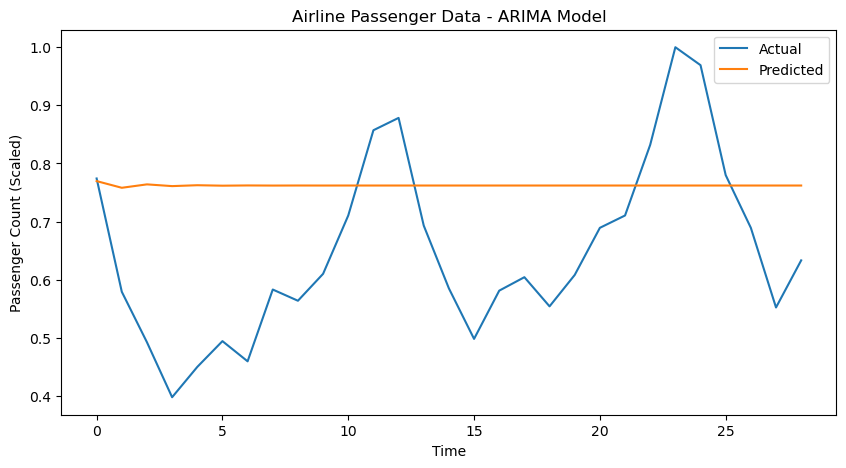

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_df, label="Actual")
plt.plot(y_pred_df, label="Predicted")
plt.title("Airline Passenger Data - ARIMA Model")
plt.xlabel("Time")
plt.ylabel("Passenger Count (Scaled)")
plt.legend()
plt.show()


In [11]:
# Inverse transform predictions to original scale
aTestNormTable = pd.DataFrame(y_test, columns=['Passenger_Count'])
actual_passenger_count = scaler.inverse_transform(aTestNormTable)
actual_passenger_count_df = conversionSingle(actual_passenger_count, ['Passenger_Count'])
print("Actual Passenger Count:\n", actual_passenger_count_df)

Actual Passenger Count:
     Passenger_Count
0             505.0
1             404.0
2             359.0
3             310.0
4             337.0
5             360.0
6             342.0
7             406.0
8             396.0
9             420.0
10            472.0
11            548.0
12            559.0
13            463.0
14            407.0
15            362.0
16            405.0
17            417.0
18            391.0
19            419.0
20            461.0
21            472.0
22            535.0
23            622.0
24            606.0
25            508.0
26            461.0
27            390.0
28            432.0


In [12]:
pTestNormTable = pd.DataFrame(y_pred, columns=['Passenger_Count'])
predicted_passenger_count = scaler.inverse_transform(pTestNormTable)
predicted_passenger_count_df = conversionSingle(predicted_passenger_count, ['Passenger_Count'])
print("Predicted Passenger Count:\n", predicted_passenger_count_df)

Predicted Passenger Count:
     Passenger_Count
0        502.653041
1        496.699486
2        499.741166
3        498.187167
4        498.981107
5        498.575482
6        498.782716
7        498.676840
8        498.730932
9        498.703297
10       498.717416
11       498.710202
12       498.713888
13       498.712005
14       498.712967
15       498.712475
16       498.712726
17       498.712598
18       498.712664
19       498.712630
20       498.712647
21       498.712639
22       498.712643
23       498.712641
24       498.712642
25       498.712641
26       498.712642
27       498.712641
28       498.712641


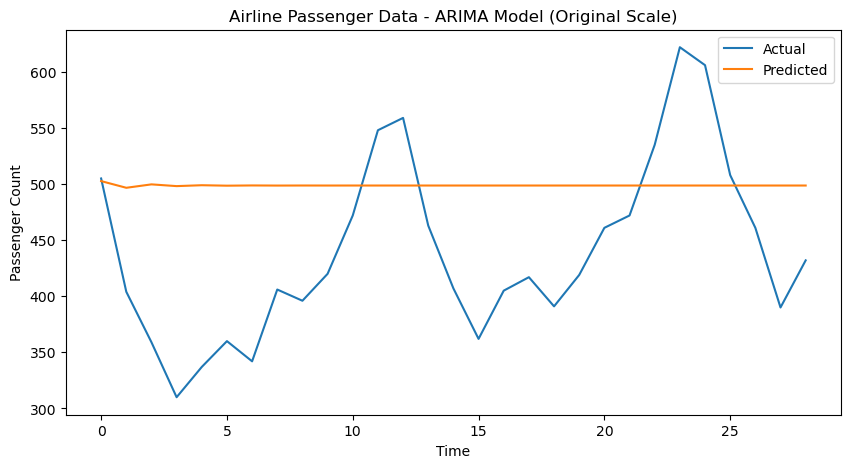

In [13]:
# Plot actual vs predicted with original scale
plt.figure(figsize=(10, 5))
plt.plot(actual_passenger_count_df, label="Actual")
plt.plot(predicted_passenger_count_df, label="Predicted")
plt.title("Airline Passenger Data - ARIMA Model (Original Scale)")
plt.xlabel("Time")
plt.ylabel("Passenger Count")
plt.legend()
plt.show()

In [14]:
# Evaluate performance on original scale
rmsemape(actual_passenger_count_df, predicted_passenger_count_df)

RMSE-Testset: 97.50156989519951
MAPE-Testset: 0.21291824540469645


In [15]:
# Forecast future values
forecast_steps = 12  # Forecasting for 1 year
forecast = model_fit.predict(start=len(data_scaled), end=len(data_scaled) + forecast_steps - 1, typ='levels')

In [16]:
# Inverse transform forecast to original scale
fTestNormTable = pd.DataFrame(forecast, columns=["Forecast"])
forecast_passenger_count = scaler.inverse_transform(fTestNormTable)
forecast_passenger_count_df = conversionSingle(forecast_passenger_count, ["Forecast"])
forecast_passenger_count_df.to_csv("AirlinePassengerForecast_ARIMA.csv", index=False)

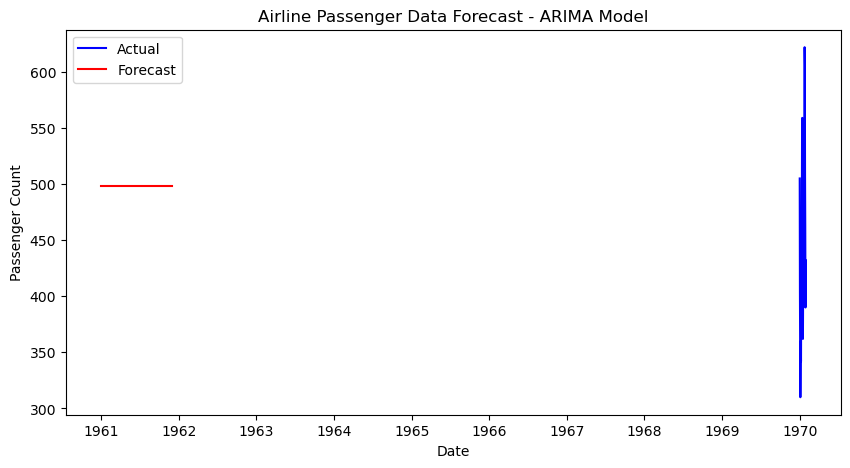

In [17]:
# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(actual_passenger_count_df, color='blue', label="Actual")
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps, freq='M'), forecast_passenger_count_df, color='red', label="Forecast")
plt.title("Airline Passenger Data Forecast - ARIMA Model")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend()
plt.show()